# Dimension Reduction Plot
- Created 10 Apr 2020

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
from matplotlib import cm
import seaborn as sns
from functools import partial
import sklearn
from sklearn.decomposition import PCA
import ctypes
from os import makedirs
import os
from os.path import join
import shutil
import umap
from joblib import dump, load

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [4]:
#Function for preprocessing data
def delete_params(params):
    return np.delete(params,[2,8,15,16,21,22,23] , axis=1)

In [5]:
exp_num = '31_2'

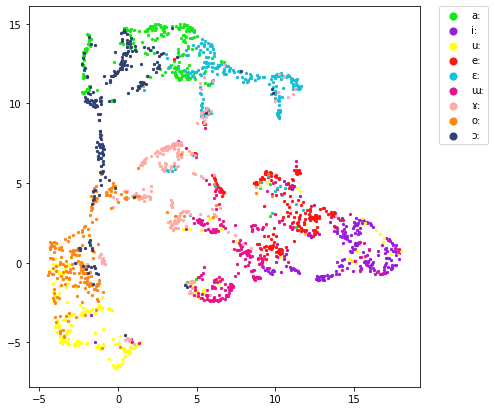

In [19]:
# DATA_PATH = '../experiment/result/predict_{}'.format(exp_num)
# ORI_DATA_PATH = '../data/d_records/record_all/'

# param = np.load(join(DATA_PATH,'testset.npz'))['param_sets']
# with open(join(ORI_DATA_PATH,'syllable_name.txt')) as f:
#     phonetic = np.array([[word.strip()[0],word.strip()[1]] for line in f for word in line.split(',')])

# p2 = delete_params(param.reshape((param.shape[0]*param.shape[1], param.shape[2])))

embedding = umap.UMAP(n_neighbors=15,
                      min_dist=0.4,
                      metric='correlation').fit_transform(p2)

# embedding = umap.UMAP(n_neighbors=8,
#                       min_dist=0.5,
#                       metric='correlation').fit_transform(param.reshape((param.shape[0]*param.shape[1], param.shape[2])))

pca_data = pd.DataFrame({'phonetic': phonetic.reshape((phonetic.shape[0]*phonetic.shape[1])), 'D1': embedding[:,0], 'D2': embedding[:,1]})

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('D1', fontsize = 15)
# ax.set_ylabel('D2', fontsize = 15)
# ax.set_title('UMAP plot', fontsize = 20)
color = ['#11EB11','#991BDE','#FFFF13','#FF1313','#14C0D8','#EB118D','#ffaaa5','#FF8413','#304174']

targets = ['a', 'i', 'u','e','E','M','7','o','O']
ipa_targets = ["a:", "i:", "u:","e:",'ɛ:','ɯ:','ɤ:','o:','ɔ:']
for i, target in enumerate(targets):
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'D1']
               , pca_data.loc[indicesToKeep, 'D2']
               , s = 5,
               alpha=1.0,
              color=color[i], 
              label=ipa_targets[i])
    
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i, _ in enumerate(targets):
    legend.legendHandles[i]._sizes = [50]
#     legend.legendHandles[i]._facecolors[0][3] = 1.0

In [109]:
DATA_PATH = '../experiment/result/predict_27'
ORI_DATA_PATH = '../data/d_records/record_m/'

C:\Users\THANATLAPTHAWAN\Anaconda3\envs\thesis_env\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "C:\Users\THANATLAPTHAWAN\Anaconda3\envs\thesis_env\lib\site-packages\umap\layouts.py", line 60:

def _optimize_layout_euclidean_single_epoch(
^

  state.func_ir.loc))


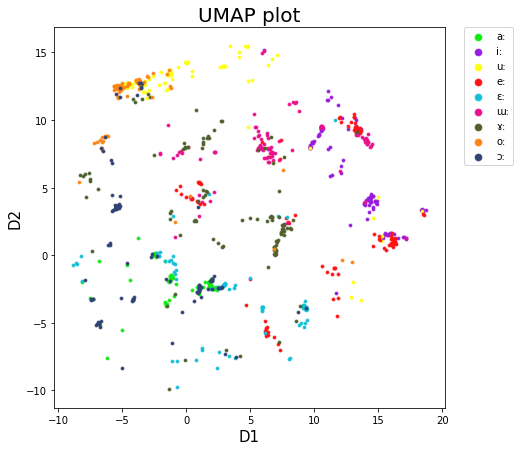

In [110]:
param = np.load(join(DATA_PATH,'testset.npz'))['param_sets']
with open(join(ORI_DATA_PATH,'syllable_name.txt')) as f:
    phonetic = np.array([[word.strip()[0],word.strip()[1]] for line in f for word in line.split(',')])
    
# phonetic_oe =  LabelEncoder().fit_transform(phonetic.reshape((phonetic.shape[0]*phonetic.shape[1])))

# embedding = umap.UMAP(n_neighbors=7,
#                       min_dist=0.3,
#                       metric='correlation').fit_transform(param.reshape((param.shape[0]*param.shape[1], param.shape[2])))

p2 = delete_params(param.reshape((param.shape[0]*param.shape[1], param.shape[2])))

embedding = umap_embed_s1.transform(p2)
pca_data = pd.DataFrame({'phonetic': phonetic.reshape((phonetic.shape[0]*phonetic.shape[1])), 'D1': embedding[:,0], 'D2': embedding[:,1]})

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('D1', fontsize = 15)
ax.set_ylabel('D2', fontsize = 15)
ax.set_title('UMAP plot', fontsize = 20)
color = ['#11EB11','#991BDE','#FFFF13','#FF1313','#14C0D8','#EB118D','#4F602D','#FF8413','#304174']

targets = ['a', 'i', 'u','e','E','M','7','o','O']
ipa_targets = ["a:", "i:", "u:","e:",'ɛ:','ɯ:','ɤ:','o:','ɔ:']
# fig = plt.figure(figsize = (7,7))
# scatter = plt.scatter(embedding[:, 0], embedding[:, 1], s= 10, c=phonetic_oe, cmap='Spectral')


for i, target in enumerate(targets):
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'D1']
               , pca_data.loc[indicesToKeep, 'D2']
               , s = 10,
               alpha=0.5,
              color=color[i], 
              label=ipa_targets[i])
    
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
for i, _ in enumerate(targets):
    legend.legendHandles[i]._sizes = [50]
    legend.legendHandles[i]._facecolors[0][3] = 1.0

## UMAP with Training data

In [43]:
 # load raw data
raw_data = np.load('../data/d_dataset_p2/dataset.npz')
train_audio_data = raw_data['ns_audio_data']
train_labels = raw_data['ns_aggregate_param']
train_phonetic = raw_data['ns_aggregate_phonetic']
del raw_data

In [44]:
train_audio_data.shape

(41890,)

In [45]:
train_phonetic.shape

(41890, 2)

In [46]:
targets = list(set(train_phonetic[:,0]))

In [47]:
train_labels.shape

(41890, 2, 24)

In [95]:
train_labels = train_labels.reshape((train_labels.shape[0]*2,train_labels.shape[2]))

In [96]:
train_labels = delete_params(train_labels)

In [97]:
umap_embed_s1 = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit(train_labels)

C:\Users\THANATLAPTHAWAN\Anaconda3\envs\thesis_env\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "C:\Users\THANATLAPTHAWAN\Anaconda3\envs\thesis_env\lib\site-packages\umap\layouts.py", line 60:

def _optimize_layout_euclidean_single_epoch(
^

  state.func_ir.loc))


In [99]:
embedding = umap_embed_s1.transform(train_labels)

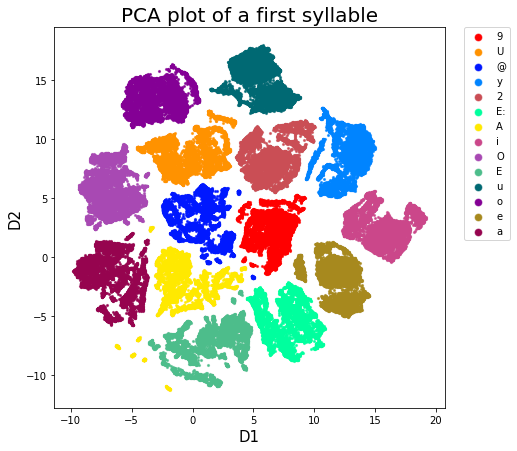

In [100]:
pca_data = pd.DataFrame({'phonetic': train_phonetic.reshape((train_phonetic.shape[0]*2,)), 'D1': embedding[:,0], 'D2': embedding[:,1]})

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('D1', fontsize = 15)
ax.set_ylabel('D2', fontsize = 15)
ax.set_title('PCA plot of a first syllable', fontsize = 20)
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

targets = ['9', 'U', '@', 'y', '2', 'E:', 'A', 'i', 'O', 'E', 'u', 'o', 'e', 'a']
for i, target in enumerate(targets):
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'D1']
               , pca_data.loc[indicesToKeep, 'D2']
               , s = 5,
               alpha=0.5,
              color=color[i], 
              label=targets[i])
    
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
for i, _ in enumerate(targets):
    legend.legendHandles[i]._sizes = [50]
    legend.legendHandles[i]._facecolors[0][3] = 1.0

In [ ]:
train_audio_data = np.array([data[:data.shape[0]//2] if i==0 else data[data.shape[0]//2:] for data in train_audio_data for i in range(2)])
max_length = max([item.shape[0] for item in train_audio_data])
train_audio_data = np.array([data[:max_length] if data.shape[0] > max_length else np.pad(data, (max(0,max_length - data.shape[0]),0), "constant") for data in train_audio_data])

In [ ]:
num_item = int(train_audio_data.shape[0]*0.4)
train_audio_data = train_audio_data[:num_item]

In [ ]:
train_phonetic = train_phonetic.reshape((train_phonetic.shape[0]*train_phonetic.shape[1]))
train_phonetic = train_phonetic[:num_item]

In [ ]:
train_phonetic.shape

In [ ]:
def prep_data():

    # load data from preprocess pipeline
    dataset = np.load(join('../data/d_dataset_3/prep_data_13','training_subsets.npz'))
    X_train =dataset['X_train']
    z_train= dataset['z_train']

    return X_train, z_train

In [ ]:
X_train, z_train = prep_data()

In [ ]:
num_item = int(X_train.shape[0]*0.4)
X_train = X_train[:num_item]
z_train = z_train[:num_item]

In [ ]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))

In [ ]:
embedding_audio = umap.UMAP(n_neighbors=20,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_train)

In [ ]:
pca_data = pd.DataFrame({'phonetic': z_train, 'D1': embedding_audio[:,0], 'D2': embedding_audio[:,1]})

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('D1', fontsize = 15)
ax.set_ylabel('D2', fontsize = 15)
ax.set_title('PCA plot of a first syllable', fontsize = 20)
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

targets = ['9', 'U', '@', 'y', '2', 'E:', 'A', 'i', 'O', 'E', 'u', 'o', 'e', 'a']
for i, target in enumerate(targets):
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'D1']
               , pca_data.loc[indicesToKeep, 'D2']
               , s = 10,
               alpha=0.5,
              color=color[i], 
              label=targets[i])
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)